In [ ]:
# 1 Load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the data 
df = pd.read_csv('./../Student_Performance.csv')
df.head()  


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [2]:
#2 Select a unique randomization seed

# Define a unique random seed
seed = 42
np.random.seed(seed)

In [3]:
#3 Sample Train Data

all_features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sample Question Papers Practiced', 'Performance Index']
features = ['Hours Studied', 'Previous Scores']
target = 'Performance Index'

# Randomly sample 30 observations for training using the seed.
train_df = df.sample(n=100, random_state=seed)

# Check that the training sample looks representative
print("Training Sample:")
train_df.head()

Training Sample:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,0,8,2,51
4684,2,46,1,4,8,20
1731,7,56,1,7,5,46
4742,6,42,1,8,5,28
4521,7,53,0,4,6,41


In [4]:
scaler = StandardScaler()

In [5]:
X_train = train_df[features].values
y_train = train_df[target].values
X_train_scaled = scaler.fit_transform(X_train)

X_train_aug = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]


In [6]:
# 4 Build the weight update function (Gradient Descent)

def gradient_descent(X, y, weights, learning_rate=0.001, iterations=100):
    m = len(y)
    weight_history = []
    loss_history = []

    for i in range(iterations):
        # Compute predictions based on current weights
        predictions = X.dot(weights)
        # Compute errors
        errors = predictions - y
        # Calculate Mean Squared Error (MSE) loss
        loss = np.mean(errors ** 2)
        loss_history.append(loss)
        
        # Compute gradients
        gradients = (1/m) * X.T.dot(errors)
        # Update weights using the gradient descent update rule
        weights = weights - learning_rate * gradients
        
        # Save a copy of the current weights and print iteration details
        weight_history.append(weights.copy())
        print(f"Iteration {i+1}: Weights = {weights}, Loss = {loss:.4f}")

    return weights, weight_history, loss_history

# Example usage:
initial_weights = np.zeros(X_train_aug.shape[1])
final_weights, weight_history, loss_history = gradient_descent(X_train_aug, y_train, initial_weights,
                                                               learning_rate=0.001, iterations=100)






Iteration 1: Weights = [0.05894    0.00995727 0.01896887], Loss = 3897.8600
Iteration 2: Weights = [0.11782106 0.0199022  0.03791752], Loss = 3889.9982
Iteration 3: Weights = [0.17664324 0.02983481 0.05684597], Loss = 3882.1523
Iteration 4: Weights = [0.2354066  0.0397551  0.07575425], Loss = 3874.3223
Iteration 5: Weights = [0.29411119 0.0496631  0.09464237], Loss = 3866.5081
Iteration 6: Weights = [0.35275708 0.05955883 0.11351037], Loss = 3858.7097
Iteration 7: Weights = [0.41134432 0.06944228 0.13235825], Loss = 3850.9271
Iteration 8: Weights = [0.46987298 0.07931349 0.15118604], Loss = 3843.1603
Iteration 9: Weights = [0.5283431  0.08917246 0.16999376], Loss = 3835.4092
Iteration 10: Weights = [0.58675476 0.09901921 0.18878144], Loss = 3827.6737
Iteration 11: Weights = [0.64510801 0.10885375 0.20754909], Loss = 3819.9539
Iteration 12: Weights = [0.7034029  0.1186761  0.22629674], Loss = 3812.2497
Iteration 13: Weights = [0.76163949 0.12848628 0.24502441], Loss = 3804.5611
Iteratio

In [7]:
#5 Display value of weights 

print(final_weights)

[5.61155085 0.93698531 1.80023066]


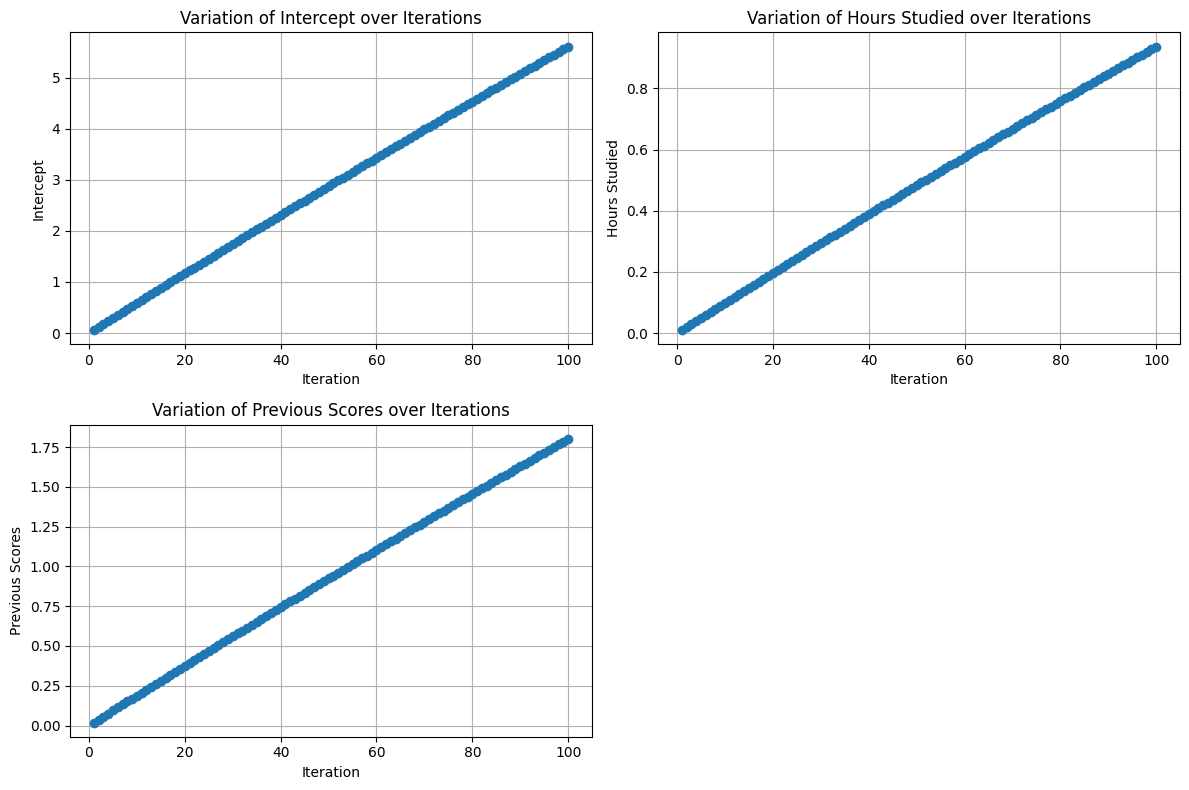

In [8]:
#6 Plot the value of weights per iteration

# Convert weight_history (list of arrays) to a NumPy array for easier slicing.
weight_history = np.array(weight_history)  # shape: (iterations, 3)

# Number of weights
num_weights = weight_history.shape[1]

names = ["Intercept"] + features

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()  # Flatten to simplify indexing

# Plot the evolution of each weight on its respective subplot
for j in range(weight_history.shape[1]):
    axs[j].plot(range(1, weight_history.shape[0] + 1), weight_history[:, j],
                marker='o', linestyle='-')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel(names[j])
    axs[j].set_title('Variation of ' + names[j] + ' over Iterations')
    axs[j].grid(True)

# Hide any unused subplots (in this case, the fourth subplot)
for k in range(weight_history.shape[1], len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()

In [15]:
def predict_regression(x, weights):
    # Ensure x is a NumPy array
    x = np.array(x)
    # Insert the bias term (1) at the beginning of the feature vector
    x_aug = np.insert(x, 0, 1)
    return np.dot(x_aug, weights)


equation_str = f"{final_weights[0]:.4f}"

# Loop over each feature and its corresponding weight
for i, feature in enumerate(features, start=1):
    coef = final_weights[i]
    # Determine the sign for proper formatting
    if coef >= 0:
        equation_str += f" + {coef:.4f}*{feature}"
    else:
        equation_str += f" - {abs(coef):.4f}*{feature}"

print("Final Regression Model:")
print("y =", equation_str)


Final Regression Model:
y = 5.6116 + 0.9370*Hours Studied + 1.8002*Previous Scores


In [10]:
#8 Sample Test Data

# Remove training observations from the original dataframe
remaining_df = df.drop(train_df.index)

# Randomly sample 30 test observations (use a different seed to avoid overlap)
test_df = remaining_df.sample(n=30, random_state=seed+1)


print("Test Sample:")
test_df.head()

Test Sample:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8879,3,75,1,6,1,57
3236,1,40,0,9,2,11
430,8,99,1,8,8,95
3759,9,83,1,4,2,78
2780,4,95,0,6,0,78


In [11]:
X_test = test_df[features].values
y_test = test_df[target].values

X_test_scaled = scaler.transform(X_test)
X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [13]:
#9 Use the regression function for prediction

# Predict using the final weights for all test observations
predictions = X_test_aug.dot(final_weights)

# Show a few predictions alongside actual values
predictions = X_test_aug.dot(final_weights)
print("Predictions on Test Set:")
predictions


Predictions on Test Set:


array([5.06200133, 0.81050107, 9.24429369, 7.96915638, 7.44154903,
       7.36004221, 5.35425949, 4.0222132 , 4.61902845, 4.85896327,
       5.99568479, 2.98701071, 3.62843601, 6.25563182, 5.9879715 ,
       4.51750942, 4.44058824, 4.78975538, 7.01087507, 4.93588446,
       4.67593743, 3.52691699, 6.74321475, 2.33328649, 2.86089384,
       3.7053572 , 5.04970241, 1.01353913, 3.72995504, 4.06682326])

In [14]:
#10 Calculate for errors

mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error on Test Set: {mse:.4f}")



Mean Squared Error on Test Set: 2432.2918
